In [13]:
from pymoo.visualization.scatter import Scatter
import numpy as np
import os, sys, glob, io, time
import csv
from thermal import modHeat
from pymoo.optimize import minimize
from pymoo.core.problem import ElementwiseEvaluationFunction, LoopedElementwiseEvaluation, Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.visualization.scatter import Scatter
import contextlib
from multiprocessing import Process
import glob

from globalProperties import *

np.set_printoptions(edgeitems=30, linewidth = 1000000)

2.19288296054323e-05 meter ** 2 * watt / joule
2e-05 meter ** 2 * watt / joule
length scale is 0.13 meter
time scale is 0.013000000000000001 second
mass scale is 0.0026034450000000002 kilogram
temperature scale is 700 kelvin
nd fluid cond:  0.11859785783836418
nd fluid diff:  1.6868330465717154e-05
nd solid cond:  4.543979227523532
nd solid diff:  1.5384615384615384e-05
length scale is 0.01 meter
time scale is 0.0005 second
mass scale is 1.1850000000000003e-06 kilogram
temperature scale is 300 kelvin


In [59]:
F = np.load("optResultsF.npy")
X = np.load("optResultsX.npy")
G = np.load("optResultsG.npy")
F[:,1] = F[:,1]/0.13
popF = np.load("popF.npy")
popX = np.load("popX.npy")
popG = np.load("popG.npy")


In [60]:
res = np.concatenate((X, F, G), axis=1)
ressorted=res[res[:, -3].argsort()]

In [31]:
pop = np.concatenate((popX, popF, popG), axis=1)
popsorted=pop[pop[:, -1].argsort()]

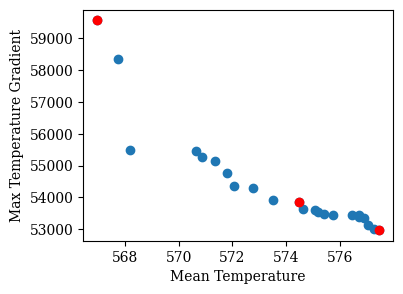

In [62]:
plt = Scatter(labels=["Mean Temperature", "Max Temperature Gradient"], figsize=(4,3))
plt.add(ressorted[:,-3:-1])
plt.add(ressorted[0,-3:-1], color='r')
plt.add(ressorted[10,-3:-1], color='r')
plt.add(ressorted[-1,-3:-1], color='r')
plt.show()

In [182]:
def mod2ansParamConv(designs, ansParamMap):
    ansParam = [None]*len(ansParamMap)
    for parameters in designs:
        i = 0
        for parameter in parameters:
            if i == 5:
                ansParam[ansParamMap[i]] = str(-parameter).replace(".", ",")
            elif i == 6 or i == 7:
                ansParam[ansParamMap[i]] = str(parameter+20).replace(".", ",")
            else:
                ansParam[ansParamMap[i]] = str(parameter).replace(".", ",")
            i += 1
        print(ansParam)

In [183]:
mod2ansParamConv([[ 3.00000000e+00,  4.98734983e+00,  1.90772210e+01,  1.43248941e+01,  1.57102973e+01, -1.32175441e+01, -2.80090378e-01,  1.45761183e+00],
                  [ 3.00000000e+00,  4.99700709e+00,  1.63527939e+01,  1.20711145e+01,  1.05991780e+01, -1.31023945e+01, -8.14275808e-01, -1.34067081e+00],
                  [ 3.00000000e+00,  4.99453280e+00,  1.18585982e+01,  1.69178400e+01,  1.00721946e+01, -1.04834109e+01,  4.68288616e-01, -6.76682467e-01]],
       [1, 0, 6, 7, 4, 5, 2, 3])

['4,98734983', '3,0', '19,719909622', '21,45761183', '15,7102973', '13,2175441', '19,077221', '14,3248941']
['4,99700709', '3,0', '19,185724192', '18,65932919', '10,599178', '13,1023945', '16,3527939', '12,0711145']
['4,9945328', '3,0', '20,468288616', '19,323317533', '10,0721946', '10,4834109', '11,8585982', '16,91784']


In [93]:
s = "DP 104 (Current)	4,9945328	3	20,468288616	19,323317533	10,0721946	10,4834109	11,8585982	16,91784"
pref = ["channelXZ", "internalXZ1", "internalXZ2", "internalYZ2", "solidXZ", "solidYZ2"]

parameters = s.split("\t")

a = "_"
for parameter in parameters[1:]:
    parameterF = round(float(parameter.replace(",", ".")), 3)
    a += "%.3f" % parameterF + "-"

for pr in pref:
    print(parameters[0][:-10].replace(" ", "") + "_" + pr  + a[:-1].replace(".", ",") + ".csv")
    # print(a)

DP104_channelXZ_4,995-3,000-20,468-19,323-10,072-10,483-11,859-16,918.csv
DP104_internalXZ1_4,995-3,000-20,468-19,323-10,072-10,483-11,859-16,918.csv
DP104_internalXZ2_4,995-3,000-20,468-19,323-10,072-10,483-11,859-16,918.csv
DP104_internalYZ2_4,995-3,000-20,468-19,323-10,072-10,483-11,859-16,918.csv
DP104_solidXZ_4,995-3,000-20,468-19,323-10,072-10,483-11,859-16,918.csv
DP104_solidYZ2_4,995-3,000-20,468-19,323-10,072-10,483-11,859-16,918.csv


In [11]:
import shutil
import glob
import os

for i in range(6):
    n = 99+i
    # print(n)
    filePattern = "DP" + str(n) + "*"
    # print(filePattern)
    # filePattern = "DP104*"
    sDir = "./outputs/thermal/rsF1/validators/"
    tDir = os.path.join("./outputs/thermal/rsF1/validators/current", filePattern[:-1])
    os.mkdir(tDir)
    filePaths = glob.glob(os.path.join(sDir, filePattern))
    for file_path in filePaths:
        tPath = os.path.join(tDir, file_path.split("_")[1]) + ".vtp"
        print(tPath)
        shutil.copy(file_path, tPath)


./outputs/thermal/rsF1/validators/current/DP99/channelYZ2.vtp
./outputs/thermal/rsF1/validators/current/DP99/internalYZ2.vtp
./outputs/thermal/rsF1/validators/current/DP99/solidYZ1.vtp
./outputs/thermal/rsF1/validators/current/DP99/channelYZ1.vtp
./outputs/thermal/rsF1/validators/current/DP99/internalXZ1.vtp
./outputs/thermal/rsF1/validators/current/DP99/channelXZ.vtp
./outputs/thermal/rsF1/validators/current/DP99/internalXZ2.vtp
./outputs/thermal/rsF1/validators/current/DP99/solidXZ.vtp
./outputs/thermal/rsF1/validators/current/DP99/internalYZ1.vtp
./outputs/thermal/rsF1/validators/current/DP99/solidYZ2.vtp
./outputs/thermal/rsF1/validators/current/DP100/internalYZ1.vtp
./outputs/thermal/rsF1/validators/current/DP100/channelYZ1.vtp
./outputs/thermal/rsF1/validators/current/DP100/solidYZ1.vtp
./outputs/thermal/rsF1/validators/current/DP100/internalXZ2.vtp
./outputs/thermal/rsF1/validators/current/DP100/internalYZ2.vtp
./outputs/thermal/rsF1/validators/current/DP100/channelYZ2.vtp
./out

In [35]:
import csv
with open('paretoAns.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    a = [row for row in spamreader]
    a = a[3:]
    a = [row[1:] for row in a]
    # print(a)
    npa = np.ones((len(a),2))
    for row in enumerate(a):
        npa[row[0],0]=row[1][0]
        npa[row[0],1]=row[1][1]

npaSorted=npa[npa[:,1].argsort()]
    

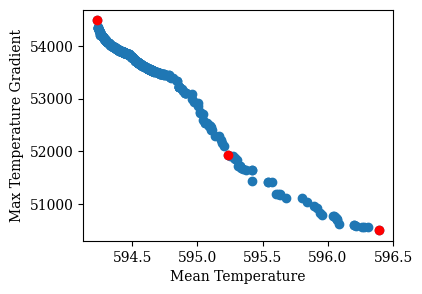

In [57]:
plt = Scatter(labels=["Mean Temperature", "Max Temperature Gradient"], figsize=(4,3))
plt.add(npaSorted)
plt.add(npaSorted[0], color='r')
plt.add(npaSorted[43], color='r')
plt.add(npaSorted[-1], color='r')
# plt.add(ressorted[:,-3:-1], color='g')
# plt.add(ressorted[0,-3:-1], color='y')
# plt.add(ressorted[10,-3:-1], color='y')
# plt.add(ressorted[-1,-3:-1], color='y')
plt.show()


In [48]:
#mod2ans nonsorted
designs = [[3.96824233124650, 4.3478073492286873,	11.44440994112209,	11.199246500509634,	13.511303693551328,	14.94396743984046,	19.51330413768459,	20.174571154717164],
               [3.76690079396928, 4.1722183064873191,	11.88943877288943,	12.847620209601896,	12.971872261596083,	13.34492621986694,	19.74916091092592,	17.725465086626937],
               [3.44527238348337, 4.3664042640751228,	11.97142738334767,	13.046668201927961,	12.947045610414397,	12.94595616907899,	18.75927052541099,	16.673037225203903]]
for design in designs:
    design[5]=-design[5]
    design[6]=design[6]-20
    design[7]=design[7]-20

print(designs)

[[3.9682423312465, 4.347807349228687, 11.44440994112209, 11.199246500509634, 13.511303693551328, -14.94396743984046, -0.4866958623154112, 0.17457115471716378], [3.76690079396928, 4.172218306487319, 11.88943877288943, 12.847620209601896, 12.971872261596083, -13.34492621986694, -0.2508390890740806, -2.2745349133730635], [3.44527238348337, 4.366404264075123, 11.97142738334767, 13.046668201927961, 12.947045610414397, -12.94595616907899, -1.2407294745890098, -3.3269627747960975]]


In [50]:
n = 7224.96

print(n/0.13)

55576.61538461538
